# Epstein Political Contributions: Analysis
---

In this short project, I analyse political contributions made by Jeffrey Epstein. This data is available on OpenSecrets.org.

In [1]:
## dataset url = https://www.opensecrets.org/featured-datasets/22

In [2]:
## import programs and initialize dataset
import pandas as pd
e_df = pd.read_csv('epstein_itemized.csv')

In [3]:
## dataset information
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cycle                    90 non-null     int64  
 1   Donor                    90 non-null     object 
 2   FamilyID                 0 non-null      float64
 3   City                     88 non-null     object 
 4   State                    88 non-null     object 
 5   Zip                      84 non-null     float64
 6   FEC Occupation/Employer  72 non-null     object 
 7   Date                     90 non-null     object 
 8   Amount                   90 non-null     object 
 9   Recipient                90 non-null     object 
 10  Party                    86 non-null     object 
 11  District                 57 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 8.6+ KB


In [4]:
## first 5 rows of the dataset
e_df.head(n)

,Cycle,Donor,FamilyID,City,State,Zip,FEC Occupation/Employer,Date,Amount,Recipient,Party,District
0,2018,"EPSTEIN, JEFFREY",NaN,ST THOMAS,VI,802.0,NaN,11/2/2018,"-$10,000",Democratic Congressional Campaign Cmte,D,NaN
1,2018,"EPSTEIN, JEFFREY",NaN,ST THOMAS,VI,802.0,NaN,10/29/2018,"$10,000",Democratic Congressional Campaign Cmte,D,NaN
2,2018,"EPSTEIN, JEFFREY",NaN,ST THOMAS,VI,802.0,FINANCIER,7/23/2018,"$2,700","Plaskett, Stacey",D,VI00
3,2016,"EPSTEIN, JEFFREY",NaN,ST THOMAS,VI,802.0,FINANCIER,8/4/2016,"$2,700","Plaskett, Stacey",D,VI00
4,2016,"EPSTEIN, JEFFREY",NaN,ST THOMAS,VI,802.0,FINANCIER,8/4/2016,"$2,700","Plaskett, Stacey",D,VI00


In [5]:
## check for missing values
print("missing values:", e_df.isnull().values.any())

missing values: True


In [6]:
## function for missing data 
def check_missing_data(e_df):
    return e_df.isnull().sum().sort_values(ascending=False)

check_missing_data(e_df)

FamilyID                   90
District                   33
FEC Occupation/Employer    18
Zip                         6
Party                       4
State                       2
City                        2
Recipient                   0
Amount                      0
Date                        0
Donor                       0
Cycle                       0
dtype: int64

In [7]:
## data cleaning
e_df['Recipient'] = (e_df.Recipient.str.split()
              .apply(lambda x: ', '.join(x[::-1]).rstrip(','))
              .where(e_df['Recipient'].str.contains(','), e_df['Recipient'])
              .str.replace(',','') )
e_df['Donor'] = (e_df.Donor.str.split()
              .apply(lambda x: ', '.join(x[::-1]).rstrip(','))
              .where(e_df['Donor'].str.contains(','), e_df['Donor'])
              .str.replace(',','') )

In [8]:
## drop unnecessary column
e_df = e_df.drop(['FamilyID'], axis = 1)

In [9]:
## data cleaning
df_clean = e_df.fillna('Unknown') 

df_clean['Amount'] = df_clean['Amount'].str.replace(',', '')
df_clean['Amount'] = df_clean['Amount'].str.replace('$', '')
df_clean['Amount'] = df_clean['Amount'].astype(int)

any(df_clean['Amount'] <0 )
df_clean[(df_clean[['Amount']] < 0).all(1)]

df_clean = df_clean.drop(df_clean.index[[0, 1, 5, 6, 9, 10, 25, 31, 64, 67]])
df_clean = df_clean.reset_index(drop=True)
df_clean

,Cycle,Donor,City,State,Zip,FEC Occupation/Employer,Date,Amount,Recipient,Party,District
0,2018,JEFFREY EPSTEIN,ST THOMAS,VI,802,FINANCIER,7/23/2018,2700,Stacey Plaskett,D,VI00
1,2016,JEFFREY EPSTEIN,ST THOMAS,VI,802,FINANCIER,8/4/2016,2700,Stacey Plaskett,D,VI00
2,2016,JEFFREY EPSTEIN,ST THOMAS,VI,802,FINANCIER,8/4/2016,2700,Stacey Plaskett,D,VI00
3,2014,MR JEFFREY EPSTEIN,ST. THOMAS,VI,802,RED HOOK ENTERPRISE,4/22/2014,2600,Gwendolyn Beck,I,VA08
4,2014,MR JEFFREY EPSTEIN,ST. THOMAS,VI,802,RED HOOK ENTERPRISE,4/17/2014,5000,Eagles Party,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
75,1992,JEFFREY EPSTEIN,NEW YORK,NY,10022,Unknown,5/15/1991,500,E Timothy Wirth,D,Unknown
76,1990,JEFFREY EPSTEIN,NEW YORK,NY,10022,Unknown,11/6/1990,1000,Tom McMillen,D,MD04
77,1990,JEFFREY EPSTEIN,NEW YORK,NY,10022,INVESTMENT BANKER,6/22/1990,1000,Wayne Owens,D,UT02
78,1990,JEFFREY EPSTEIN,NEW YORK,NY,10022,INVESTMENT BANKER,6/22/1990,1000,Wayne Owens,D,UT02


In [10]:
## retrieve the ten largest donees
df_clean.groupby('Recipient')['Amount'].sum().nlargest(10)

Recipient
Democratic Senatorial Campaign Cmte    34000
DSCC/Non-Federal Unicorp Assoc         25000
DNC Services Corp                      22000
New York Senate 2000                   20000
DNC/Non-Federal Individual             10000
Victory in New York                    10000
Stacey Plaskett                         8100
E Charles Schumer                       7000
Celebration '94                         5000
Eagles Party                            5000
Name: Amount, dtype: int32

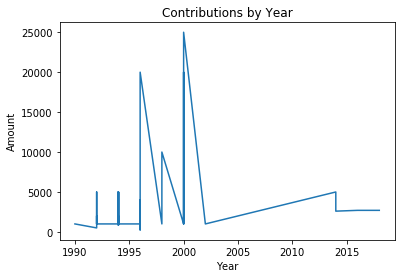

In [11]:
## visualize contributions by year
import matplotlib.pyplot as plt 
x = df_clean['Cycle']
y = df_clean['Amount']
plt.plot(x, y)
plt.xlabel('Year') 
plt.ylabel('Amount')  
plt.title('Contributions by Year')  
plt.show()